# Урок 1. ОСНОВНЫЕ ПОНЯТИЯ СТАТИСТИКИ

Пришло время первого небольшого проекта по статистике! На этот раз исследуем набор данных о видеоиграх, объем продаж которых составил более 100 000 копий.

Описание данных  
Имеются следующие поля:

· Rank – место по объему продаж  
· Name – название игры  
· Platform – платформа, на которой выпущена игра  
· Year – год релиза  
· Genre – жанр   
· Publisher – издатель  
· NA_Sales – продажи в Северной Америке, в млн.  
· EU_Sales – продажи в Европе, в млн.  
· JP_Sales – продажи в Японии, в млн.  
· Other_Sales – продажи в остальном мире, в млн.  
· Global_Sales – продажи по всему миру, в млн.  

### 1

Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, типы данных, размерность, наличие пропущенных значений.

В каком столбце встретилось больше всего пропущенных значений? В качестве ответа укажите их число, после чего удалите строки с пропущенными значениями из датасета.

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss


sns.set(rc={'figure.figsize':(16, 6)}, style='whitegrid')

In [11]:
games = pd.read_csv('games.csv')

In [12]:
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [13]:
games.shape

(16598, 11)

В каком столбце больше всего пропусков?

In [14]:
games.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Уберем их:

In [16]:
games.dropna(inplace=True)

In [17]:
games.shape

(16291, 11)

### 2

Проверим, какие переменные являются количественными, а какие категориальными. Соотнесите названия переменных с соответствующим типом данных.

In [18]:
games.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

Rank - ранговая  
Name - номинативная  
Platform - номинативная  
Year - дискретная  
Genre - номинативная  
Publisher - номинативная  
NA_Sales - непрерывная  
EU_Sales - непрерывная  
JP_Sales - непрерывная  
Other_Sales - непрерывная  
Global_Sales - непрерывная  

In [20]:
games.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


### 3

Выведите описательные характеристики переменной Year и постройте график распределения количества выпущенных игр по годам.

Выберите верные утверждения:
    
· __Мода равна 2009__  
· Мода равна 2007    
· __Медианный год больше, чем средний__  
· __Примерно половина игр была выпущена после 2007 года__  
· Медианный год меньше, чем средний  

C:\Users\DNS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='count'>

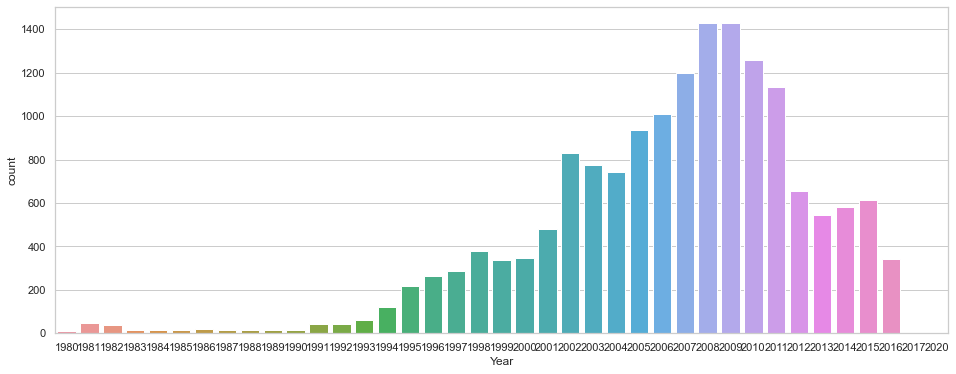

In [69]:
games.Year = games.Year.astype('int') # преобразуем их в integer
sns.countplot(games.Year)

Отфильтруем по годам и поделим на общее количество строк, чтобы оценить долю от целого:

In [35]:
games.query('Year > 2007').shape[0] / games.Year.shape[0]

0.4906390031305629

In [38]:
games.Year.describe() # 50%

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

Посмотрим моду:

In [44]:
year_count = games.Year.value_counts().reset_index()
year_count.columns = ['year', 'cnt']
year_count.head(3)

,year,cnt
0,2009,1431
1,2008,1428
2,2010,1257


### 4

На каких платформах произошло больше всего релизов?

Оставьте названия только тех платформ, частота встречаемости которых составляет более 7%. Значения укажите в порядке убывания частоты встречаемости через запятую с пробелом.

In [54]:
platforms = games.Platform.value_counts(normalize=True).mul(100).to_frame('pct')
platforms.query('pct > 7').index.to_list()

['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS']

### 5

Игры каких издателей (Publisher) встречаются в датасете чаще всего?

В качестве ответа укажите наибольшую абсолютную частоту встречаемости.

In [57]:
games.Publisher.value_counts().head(10)

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Sega                             632
Take-Two Interactive             412
Name: Publisher, dtype: int64

In [60]:
ss.mode(games.Publisher)

ModeResult(mode=array(['Electronic Arts'], dtype=object), count=array([1339]))

### 6

Сфокусируемся на играх от Nintendo. Посчитайте среднее, медиану и стандартное отклонение по продажам игр данного издателя в разных регионах (NA, EU, JP, Other). 

В каком регионе медианное значение объема продаж является наибольшим?

In [61]:
games.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


In [67]:
nintendo = games.query('Publisher == "Nintendo"')
nintendo[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].agg(['mean', 'median'])

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
mean,1.172055,0.601006,0.653721,0.136767
median,0.375000,0.120000,0.280000,0.030000


Соответственно, это Северная Америка.

### 7

Теперь посмотрим на продажи Nintendo в Японии по жанрам. Постройте боксплот, где:

по оси x будет расположен жанр игры (Genre)  
по оси у – объем продаж в Японии (JP_sales)  
Взглянем на получившиеся боксплоты. Что мы можем по ним сказать о данных?  

· __Наибольший межквартильный размах наблюдается у игр жанра Fighting__    
· __Медианное значение продаж игр жанра Fighting выше, чем у игр Simulation__    
· Наибольший межквартильный размах наблюдается у игр жанра Role-Playing  
· Среднее значение продаж игр жанра Fighting выше, чем у игр Simulation  
· __Межквартильный размах у Strategy меньше, чем у Puzzle__  

<AxesSubplot:xlabel='Genre', ylabel='JP_Sales'>

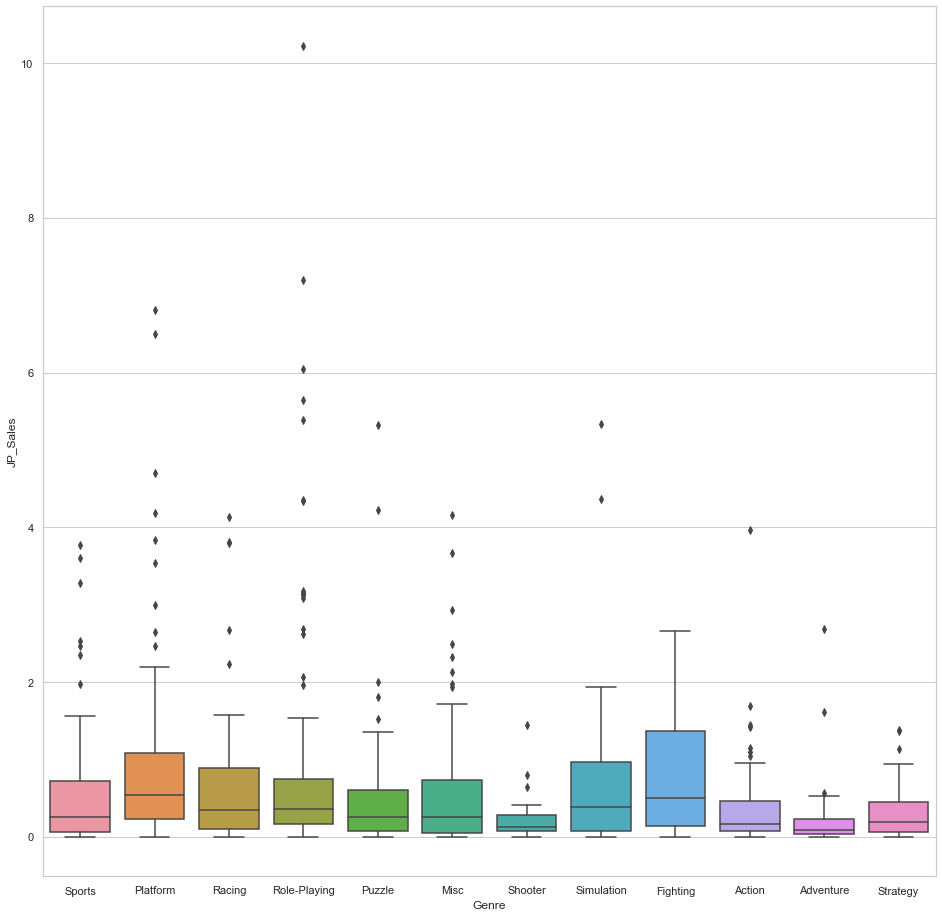

In [73]:
plt.figure(figsize=(16, 16))
sns.boxplot(data=games.query('Publisher == "Nintendo"'), x='Genre', y='JP_Sales')

### 8

Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports.

На каком отрезке времени игры жанра Sports были наиболее популярны? Иными словами, выберите наименьший отрезок, который включает в себя несколько крупных пиков. 

· 2005 – 2006  
· 1998 – 2014  
· 2009 – 2015  
· __2005 – 2010__

In [81]:
df = nintendo.query("Genre in ('Fighting', 'Simulation', 'Platform', 'Racing', 'Sports')").groupby(['Genre', 'Year'], as_index=False).agg({'Global_Sales': 'sum'})

In [83]:
df.head()

,Genre,Year,Global_Sales
0,Fighting,1987,5.42
1,Fighting,1993,2.00
2,Fighting,1995,3.20
3,Fighting,1996,0.99
4,Fighting,1999,5.55


<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

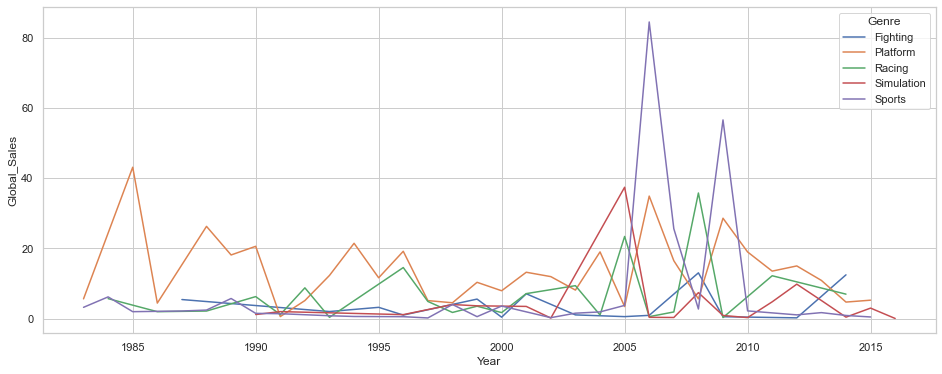

In [87]:
sns.lineplot(x='Year', y='Global_Sales', hue='Genre', data=df)